In [ ]:
# pip install numpy
# pip install econml
# pip install pandas
# pip install scipy==1.7.3
# pip install dowhy
# pip install scikit-learn
# pip install shap

In [ ]:
pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 27.3 MB/s eta 0:00:00


In [ ]:
pip install shap

In [ ]:
# pip install dowhy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import MultiTaskLassoCV
from econml.sklearn_extensions.linear_model import WeightedLassoCV
from sklearn.linear_model import LogisticRegressionCV
import io
import shap
# from dowhy import CausalModel
from IPython.display import Image, display
from sklearn.linear_model import LassoCV
from econml.cate_interpreter import SingleTreePolicyInterpreter
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from statsmodels.stats.multitest import multipletests
from scipy import stats

ModuleNotFoundError: No module named 'econml'

In [ ]:
from econml.orf import DMLOrthoForest as CausalForest
from econml.dml import CausalForestDML

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文

# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl

import matplotlib.pyplot as plt

from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')

mpl.rc('font', family='Taipei Sans TC Beta')

--2024-01-02 06:11:33--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.63.102, 172.253.63.138, 172.253.63.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oepe81k036a4vgvip7dvvj158ktv3c6l/1704175875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3f6e7dcb-abfb-4116-940e-842a6f9ed289 [following]
--2024-01-02 06:11:34--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/oepe81k036a4vgvip7dvvj158ktv3c6l/1704175875000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=3f6e7dcb-abfb-4116-940e-842a6f9ed289
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.122.132, 2607:f8b0:4004:c09::84
Connecting to doc-0

## 導入並整理示範數據集

In [ ]:
from google.colab import files
# # 上傳csv檔案
uploaded = files.upload()

Saving 22_23_clean_data.csv to 22_23_clean_data (3).csv


In [ ]:
# df = pd.read_excel(io.BytesIO(uploaded["22_23_clean_data.xlsx"]))
# df

In [ ]:
df = pd.read_csv("22_23_clean_data.csv", encoding='big5', delimiter='\t')
df

,date,勇士,國王,領航員,工程師,夢想家,鋼鐵人,比賽間格,WIN,主場,...,罰球得分數,助攻,失誤,抄截,阻攻,犯規,周末,淨勝分,觀眾人數,球星數量
0,2021/12/4,1,0,0,0,0,0,0,0,1,...,20,20,24,8,1,18,1,-3,6788,0
1,2021/12/5,1,0,0,0,0,0,0,1,1,...,7,17,11,15,6,8,1,25,6062,0
2,2021/12/11,1,0,0,0,0,0,5,1,0,...,13,16,12,10,8,25,1,11,7207,0
3,2021/12/18,1,0,0,0,0,0,6,0,0,...,15,15,22,12,4,21,1,-7,6032,0
4,2021/12/25,1,0,0,0,0,0,6,1,0,...,16,11,12,9,3,23,1,10,6714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2023/4/23,0,0,0,0,0,1,0,1,1,...,25,21,17,6,6,22,1,6,5321,0
414,2023/4/30,0,0,0,0,0,1,6,0,0,...,11,23,15,7,2,19,1,-4,6800,0
415,2023/5/6,0,0,0,0,0,1,5,1,0,...,6,29,17,14,2,16,1,17,7000,0
416,2023/5/13,0,0,0,0,0,1,6,1,1,...,10,18,5,6,2,19,1,20,5321,0


In [ ]:
df = df.dropna(subset=['主場', '淨勝分', '國王', '領航員', '工程師', '夢想家', '鋼鐵人', '背靠背', '球星數量', '觀眾人數'])

In [ ]:
df1 = df.drop(columns = 'date')
df1 = df.drop(columns = ['WIN', '罰球數', '二分命中率', '三分命中率', '罰球命中率',
                         '助攻', '失誤', '抄截', '阻攻', '犯規', '周末', '背靠背', '二分出手數', '二分得分數', '三分出手數', '三分得分數', '罰球得分數'])
# df = df.drop(columns = '勇士')
# df = df.drop(columns = '觀眾人數')
# df = df.drop(columns = ['勇士', '國王','領航員', '工程師', '夢想家', '鋼鐵人', '比賽間格', 'WIN',
#  '背靠背', '罰球數', '籃板', '助攻','觀眾人數',
#  '失誤', '抄截', '阻攻', '犯規', '周末', '球星數量'])

In [ ]:
# # 所有的變量名稱
# # regressors = list(df.columns)
# regressors = ['勇士', '國王', '領航員', '工程師', '夢想家', '鋼鐵人', '比賽間格',
#               '背靠背','觀眾人數', '球星數量']
# regressors

# 模型應用

## 淨勝分主迴歸

In [ ]:
# 數據切割
train, test = train_test_split(df1, test_size=0.2)

In [ ]:
train

,date,勇士,國王,領航員,工程師,夢想家,鋼鐵人,比賽間格,主場,淨勝分,觀眾人數,球星數量
411,2023/4/16,0,0,0,0,0,1,1,0,7,6800,0
304,2022/12/4,0,0,0,1,0,0,0,1,-14,4062,0
56,2022/5/14,0,1,0,0,0,0,13,1,30,2194,2
6,2022/1/2,1,0,0,0,0,0,0,1,5,6849,0
265,2022/12/17,0,0,1,0,0,0,5,1,14,2632,1
...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023/3/18,0,0,1,0,0,0,12,1,-8,2073,1
174,2022/4/24,0,0,0,0,0,1,6,0,9,2012,2
356,2023/2/5,0,0,0,0,1,0,1,0,-15,5604,0
53,2022/4/23,0,1,0,0,0,0,5,1,-18,3071,1


### CausalForestDML

In [ ]:
treatment = '主場'
outcome = '淨勝分'
covariates = ['勇士', '國王', '領航員', '工程師', '夢想家', '鋼鐵人', '比賽間格'
              ,'觀眾人數', '球星數量']
all__features_name = [treatment] + covariates
all__features = train[all__features_name]
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None # 並沒有cofounders 同時影響主場及淨勝分
X_test = test[covariates]

In [ ]:
causal_forest = CausalForestDML(criterion='het',
                 n_estimators=100,
                 min_samples_leaf=3,
                 max_depth=None,
                 max_samples=0.5,
                 discrete_treatment=True,
                 honest=True,
                 inference=True,
                 cv=10, model_y=WeightedLassoCV(), model_t=LogisticRegressionCV()) #cv是交叉驗證的fold
causal_forest.fit(Y, T, X=X, W=W)
causal_forest.const_marginal_ate(X_test)
# lb, ub = est.effect_interval(X_test, alpha=0.05)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


array([2.59464522])

###因果樹

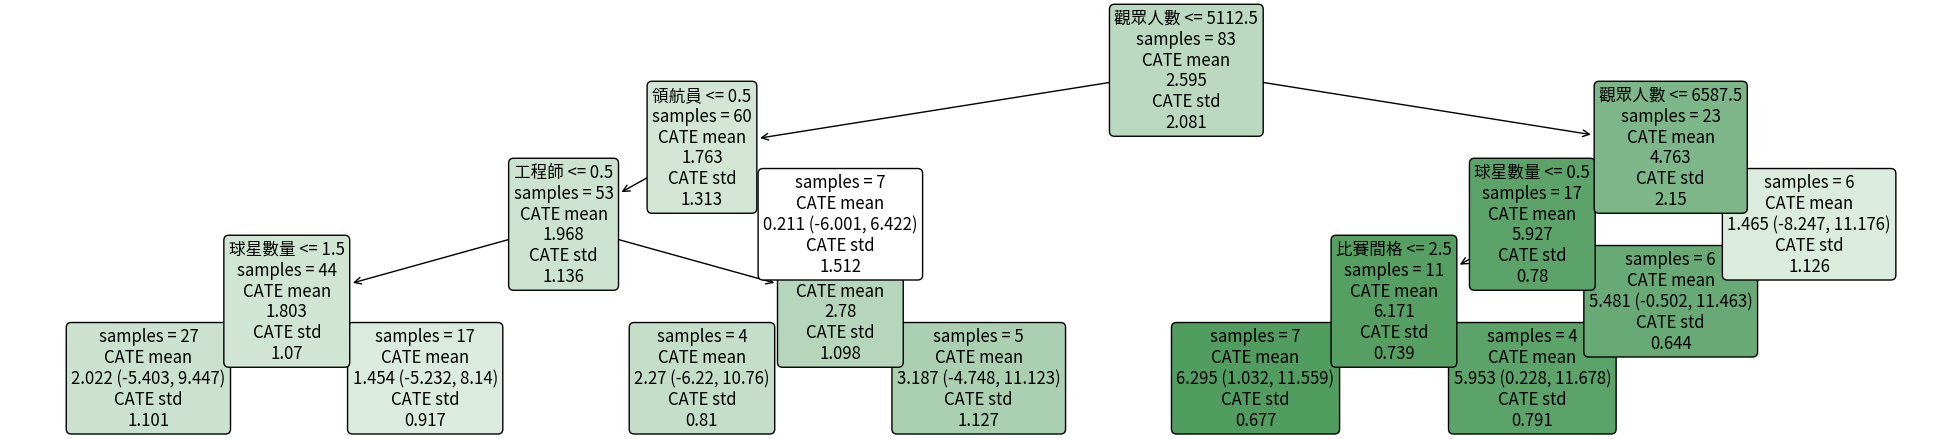

In [ ]:
%matplotlib inline
from econml.cate_interpreter import SingleTreePolicyInterpreter
from econml.cate_interpreter import SingleTreeCateInterpreter
# We find a tree-based treatment policy based on the CATE model
# intrp = SingleTreePolicyInterpreter(risk_level=0.05, max_depth=2, min_samples_leaf=1,min_impurity_decrease=.001)
# intrp.interpret(causal_forest, X, sample_treatment_costs=0.2)
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=4, min_samples_leaf=4)
intrp.interpret(causal_forest, X_test)
# Plot the tree
plt.figure(figsize=(25, 5))
intrp.plot(feature_names=covariates, fontsize=12)
plt.show()
plt.close()

### 計算各特徵分段Cate圖表

In [ ]:
# %matplotlib inline
# def calculate_cate_by_feature_bins(causal_forest, X, feature, bins):
#     bin_indices = np.digitize(X[feature], bins)
#     cate_by_bins = []
#     valid_bins = []

#     for i in range(1, len(bins)):
#         X_bin = X[bin_indices == i]
#         if len(X_bin) > 0:  # 确保区间内有足够的数据
#             cate_bin = causal_forest.effect(X_bin).mean()
#             cate_by_bins.append(cate_bin)
#             valid_bins.append(bins[i-1])  # 保存有效的区间边界

#     return valid_bins, cate_by_bins

# # 绘制每个特征的 CATE
# for feature in covariates:
#     feature_values = X[feature]
#     bins = np.linspace(feature_values.min(), feature_values.max(), num=5)

#     valid_bins, cate_by_bins = calculate_cate_by_feature_bins(causal_forest, X, feature, bins)

#     plt.figure(figsize=(8, 4))
#     plt.plot(valid_bins, cate_by_bins, marker='o', linestyle='-')
#     plt.xlabel(feature)
#     plt.ylabel('CATE')
#     plt.title(f'CATE by Different Ranges of {feature}')
#     plt.show()
# plt.close()

### 計算各特徵在中位數上下的CATE

In [ ]:
medians = X.median()

# 1. 計算 CATE 並進行統計檢驗
cate_results = {}
p_values = []
for feature in covariates:
    X_high = X[X[feature] > medians[feature]]
    X_low = X[X[feature] <= medians[feature]]
    cate_high = causal_forest.effect(X_high)
    cate_low = causal_forest.effect(X_low)
    cate_results[feature] = {'High': np.mean(cate_high), 'Low': np.mean(cate_low)}
    # 進行 t 檢驗
    t_stat, p_value = stats.ttest_ind(cate_high, cate_low)
    p_values.append(p_value)

# 2. 計算標準化差異 (std.diff)
def calculate_std_diff(X, T):
    treated = X[T == 1]
    control = X[T == 0]
    std_diff = {}
    for col in X.columns:
        mean_diff = treated[col].mean() - control[col].mean()
        pooled_std = np.sqrt((treated[col].std()**2 + control[col].std()**2) / 2)
        std_diff[col] = mean_diff / pooled_std
    return std_diff

std_diff_results = calculate_std_diff(X, T)

# 3. 輸出結果
print("CATE Results:")
for feature in cate_results:
    print(f"{feature}: High = {cate_results[feature]['High']}, Low = {cate_results[feature]['Low']}, p-value = {p_values[covariates.index(feature)]}")

print("\nStandardized Differences:")
print(std_diff_results)

NameError: name 'causal_forest' is not defined

### Shap Value

#### 淨勝分主迴歸 : 觀察當在主場比賽 各變數的異質性

In [ ]:
shap_values = causal_forest.shap_values(X) # 主場=1時的shap_value
shap_values

{'淨勝分': {'主場_1.0': .values =
  array([[ -1.7226314 ,   0.07100062,  -1.04555847, ...,  -2.06364702,
           -3.57525792,   1.14637974],
         [  1.33460307,  -0.60228523,  -1.20945349, ...,  -4.7077905 ,
           13.88534371,  -0.36816025],
         [ -0.11544524,  -0.10450144,  -0.31380909, ...,   2.53753223,
            2.41193244,   0.28147289],
         ...,
         [ -0.31947491,  15.76124701,  -1.25766763, ...,  -7.2937676 ,
          -12.08549457,   0.51921686],
         [ -1.26463171,  -0.51265214,  -0.99354891, ...,   5.24448337,
           -2.46677431,   0.08986754],
         [ -0.28112934,  -1.1161195 ,  11.62135496, ...,  -8.73465123,
          -14.76282196,   0.30488234]])
  
  .base_values =
  array([-1.7299513, -1.7299513, -1.7299513, -1.7299513, -1.7299513,
         -1.7299513, -1.7299513, -1.7299513, -1.7299513, -1.7299513,
         -1.7299513, -1.7299513, -1.7299513, -1.7299513, -1.7299513,
         -1.7299513, -1.7299513, -1.7299513, -1.7299513, -1.7299513,


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


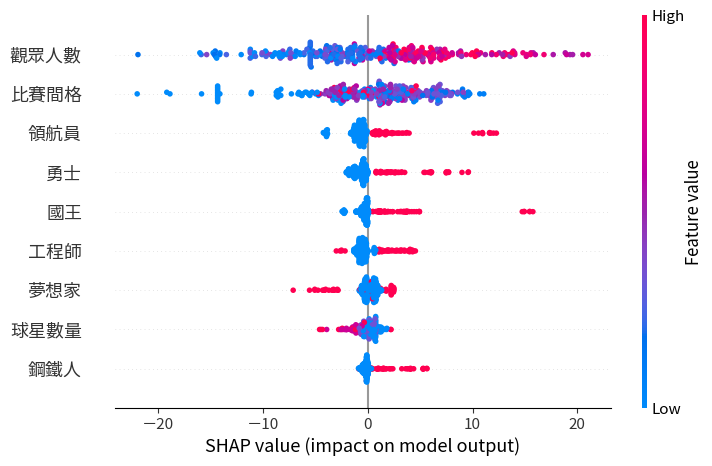

In [ ]:
shap.plots.beeswarm(shap_values['淨勝分']['主場_1.0']) # 可以找出CATE分群依據
plt.close()

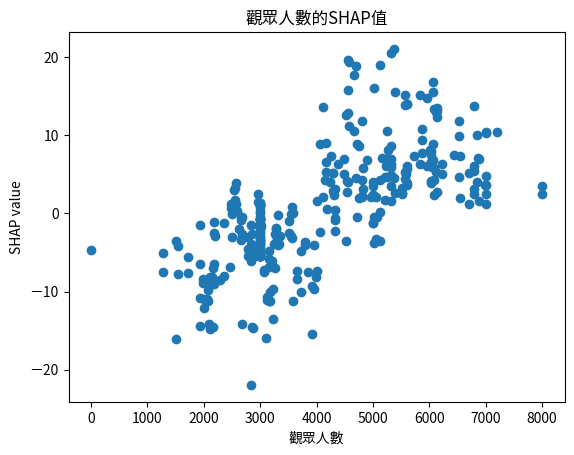

In [ ]:
# 找出特徵 '觀眾人數' 的索引
feature_index = shap_values["淨勝分"]["主場_1.0"].feature_names.index('觀眾人數')

# 提取 SHAP 值
shap_values_for_audience = shap_values["淨勝分"]["主場_1.0"].values[:, feature_index]

# 提取原始特徵數據
audience_feature_values = shap_values["淨勝分"]["主場_1.0"].data[:, feature_index]

# 使用 matplotlib 繪製散點圖
import matplotlib.pyplot as plt

plt.scatter(audience_feature_values, shap_values_for_audience)
plt.xlabel('觀眾人數')
plt.ylabel('SHAP value')
plt.title('觀眾人數的SHAP值')
plt.show()

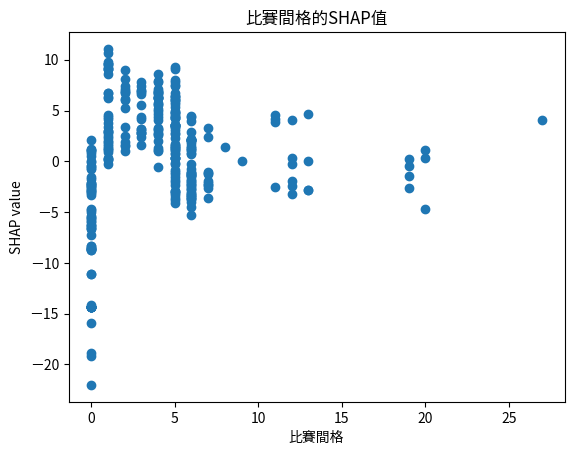

In [ ]:
# 找出特徵 '觀眾人數' 的索引
feature_index = shap_values["淨勝分"]["主場_1.0"].feature_names.index('比賽間格')

# 提取 SHAP 值
shap_values_for_audience = shap_values["淨勝分"]["主場_1.0"].values[:, feature_index]

# 提取原始特徵數據
audience_feature_values = shap_values["淨勝分"]["主場_1.0"].data[:, feature_index]

# 使用 matplotlib 繪製散點圖
import matplotlib.pyplot as plt

plt.scatter(audience_feature_values, shap_values_for_audience)
plt.xlabel('比賽間格')
plt.ylabel('SHAP value')
plt.title('比賽間格的SHAP值')
plt.show()

In [ ]:
subset_1 = X[X['勇士'] == 1]
subset_2 = X[X['勇士'] == 0]

In [ ]:
# shap_values = causal_forest.shap_values(subset_1) # 主場=1時的shap_value
# shap_values

In [ ]:
# shap.plots.beeswarm(shap_values['淨勝分']['主場_1.0']) # 可以找出CATE分群依據
# plt.close()

### 信賴區間

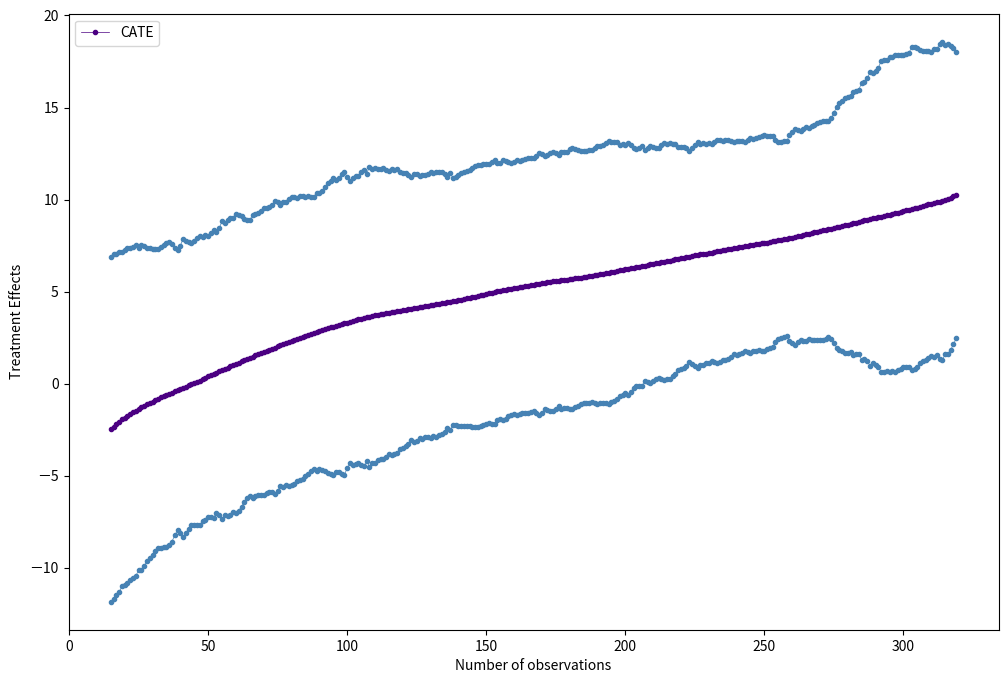

In [ ]:
# use causal forest model to estimate treatment effects
treatment_effects = causal_forest.effect(X)
# calculate lower bound and upper bound confidence intervals
lb, ub = causal_forest.effect_interval(X, alpha=0.05)
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])
# merge dataframes and sort
# df = te_df.merge(lb_df, left_on=te_df.index, right_on=lb_df.index, how='left')
ci_df = te_df.merge(lb_df, left_index=True, right_index=True, how='left')
ci_df = ci_df.merge(ub_df, left_index=True, right_index=True, how='left')
# df.drop(columns=['key_0'], inplace=True)
# df = df.merge(ub_df, left_on=df.index, right_on=ub_df.index, how='left')
# df.drop(columns=['key_0'], inplace=True)
ci_df.sort_values('cate', inplace=True, ascending=True)
ci_df.reset_index(inplace=True, drop=True)

# # calculate rolling mean
z = ci_df.rolling(window=30, center=True).mean()
# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')

# 計算信賴區間上界和下界之間的距離
# z['distance'] = z['ub'] - z['lb']

# 找到距離最短的點
# min_distance_point = z.loc[z['distance'].idxmin()]
# plt.scatter(z[z['cate']==min_distance_point['cate']].index, min_distance_point['lb'], color='red', label='Min Distance Point (Lower Bound)')
# plt.scatter(z[z['cate']==min_distance_point['cate']].index, min_distance_point['ub'], color='green', label='Min Distance Point (Upper Bound)')
# min_distance_index = z[z['cate'] == min_distance_point['cate']].index[0]
# plt.plot([min_distance_index, min_distance_index], [min_distance_point['lb'], min_distance_point['ub']], color='blue', label='Min Distance Line')

# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

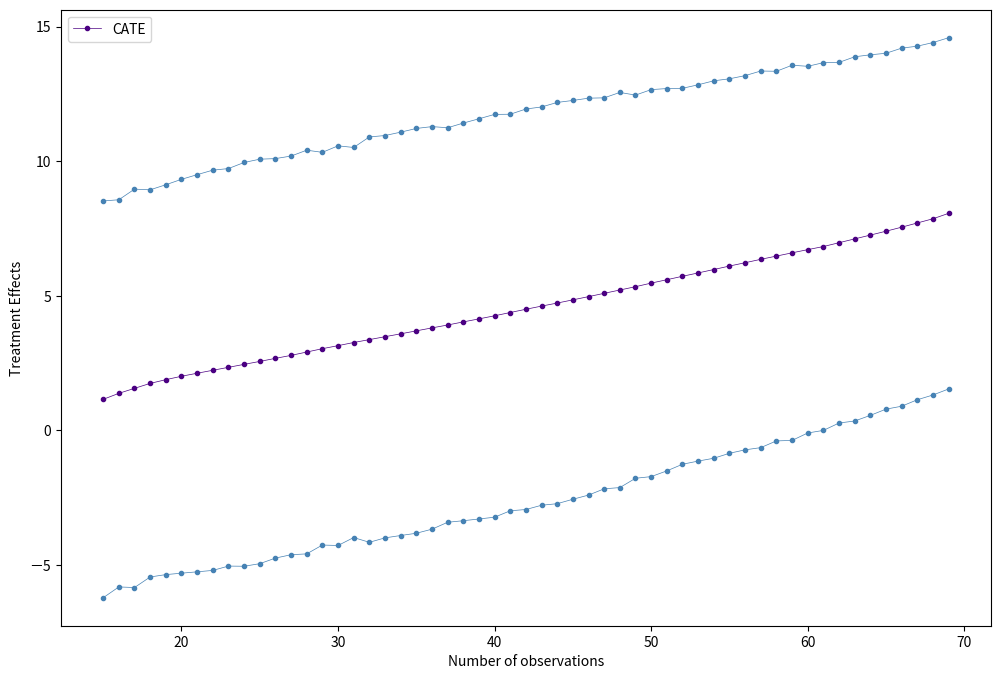

In [ ]:
# use causal forest model to estimate treatment effects
treatment_effects = causal_forest.effect(X_test)
# calculate lower bound and upper bound confidence intervals
lb, ub = causal_forest.effect_interval(X_test, alpha=0.05)
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])
# merge dataframes and sort
# df = te_df.merge(lb_df, left_on=te_df.index, right_on=lb_df.index, how='left')
ci_df = te_df.merge(lb_df, left_index=True, right_index=True, how='left')
ci_df = ci_df.merge(ub_df, left_index=True, right_index=True, how='left')
# df.drop(columns=['key_0'], inplace=True)
# df = df.merge(ub_df, left_on=df.index, right_on=ub_df.index, how='left')
# df.drop(columns=['key_0'], inplace=True)
ci_df.sort_values('cate', inplace=True, ascending=True)
ci_df.reset_index(inplace=True, drop=True)

# # calculate rolling mean
z = ci_df.rolling(window=30, center=True).mean()
# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

## 淨勝分迴歸 : 兩分 三分 罰球之命中率

In [ ]:
df2 = df.dropna(subset=['主場', '淨勝分', '二分命中率', '三分命中率', '罰球命中率'])
df2

,date,勇士,國王,領航員,工程師,夢想家,鋼鐵人,比賽間格,WIN,主場,...,罰球得分數,助攻,失誤,抄截,阻攻,犯規,周末,淨勝分,觀眾人數,球星數量
0,2021-12-04,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,20.0,24.0,8.0,1.0,18.0,1.0,-3.0,6788.0,0.0
1,2021-12-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,17.0,11.0,15.0,6.0,8.0,1.0,25.0,6062.0,0.0
2,2021-12-11,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,...,NaN,16.0,12.0,10.0,8.0,25.0,1.0,11.0,7207.0,0.0
3,2021-12-18,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,15.0,15.0,22.0,12.0,4.0,21.0,1.0,-7.0,6032.0,0.0
4,2021-12-25,1.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,...,16.0,11.0,12.0,9.0,3.0,23.0,1.0,10.0,6714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2023-04-23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,25.0,21.0,17.0,6.0,6.0,22.0,1.0,6.0,5321.0,0.0
414,2023-04-30,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,11.0,23.0,15.0,7.0,2.0,19.0,1.0,-4.0,6800.0,0.0
415,2023-05-06,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,...,6.0,29.0,17.0,14.0,2.0,16.0,1.0,17.0,7000.0,0.0
416,2023-05-13,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,...,10.0,18.0,5.0,6.0,2.0,19.0,1.0,20.0,5321.0,0.0


In [ ]:
df2 = df.dropna(subset=['主場', '淨勝分', '二分得分數', '三分得分數', '罰球得分數'])
df2

,date,勇士,國王,領航員,工程師,夢想家,鋼鐵人,比賽間格,WIN,主場,...,罰球得分數,助攻,失誤,抄截,阻攻,犯規,周末,淨勝分,觀眾人數,球星數量
3,2021-12-18,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,15.0,15.0,22.0,12.0,4.0,21.0,1.0,-7.0,6032.0,0.0
4,2021-12-25,1.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,...,16.0,11.0,12.0,9.0,3.0,23.0,1.0,10.0,6714.0,0.0
5,2022-01-01,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,...,25.0,15.0,20.0,16.0,3.0,18.0,1.0,-8.0,6981.0,0.0
6,2022-01-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,12.0,23.0,11.0,11.0,4.0,13.0,1.0,5.0,6849.0,0.0
7,2022-01-07,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,10.0,18.0,15.0,12.0,7.0,13.0,0.0,-6.0,3000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2023-04-23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,25.0,21.0,17.0,6.0,6.0,22.0,1.0,6.0,5321.0,0.0
414,2023-04-30,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,...,11.0,23.0,15.0,7.0,2.0,19.0,1.0,-4.0,6800.0,0.0
415,2023-05-06,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,...,6.0,29.0,17.0,14.0,2.0,16.0,1.0,17.0,7000.0,0.0
416,2023-05-13,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0,...,10.0,18.0,5.0,6.0,2.0,19.0,1.0,20.0,5321.0,0.0


In [ ]:
train, test = train_test_split(df2, test_size=0.2)

In [ ]:
treatment = '主場'
outcome = '淨勝分'
covariates = ['二分得分數', '三分得分數', '罰球得分數']

Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None # 並沒有cofounders 同時影響主場及淨勝分
X_test = test[covariates]

In [ ]:
treatment = '主場'
outcome = '淨勝分'
covariates = ['二分命中率', '三分命中率', '罰球命中率']

Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None # 並沒有cofounders 同時影響主場及淨勝分
X_test = test[covariates]

In [ ]:
causal_forest = CausalForestDML(criterion='het',
                 n_estimators=100,
                 min_samples_leaf=3,
                 max_depth=None,
                 max_samples=0.5,
                 discrete_treatment=True,
                 honest=True,
                 inference=True,
                 cv=10, model_y=WeightedLassoCV(), model_t=LogisticRegressionCV()) #cv是交叉驗證的fold
causal_forest.fit(Y, T, X=X, W=W)
causal_forest.const_marginal_ate(X_test)
# lb, ub = est.effect_interval(X_test, alpha=0.05)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


array([1.83665852])

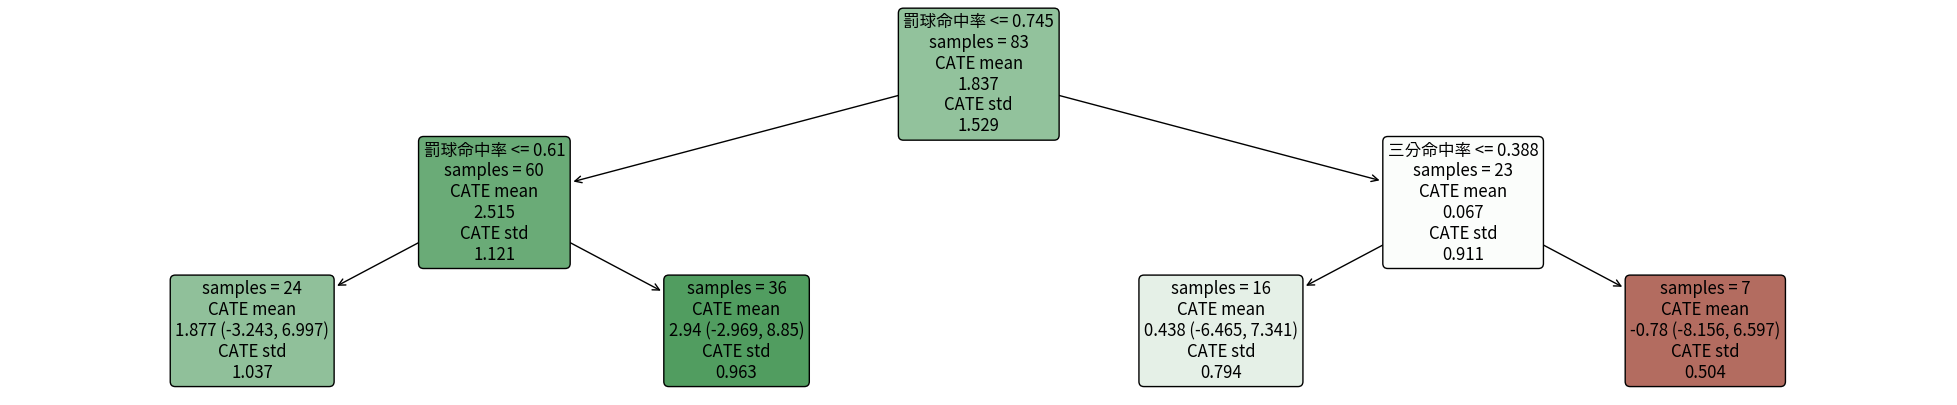

In [ ]:
%matplotlib inline
from econml.cate_interpreter import SingleTreePolicyInterpreter
from econml.cate_interpreter import SingleTreeCateInterpreter
# We find a tree-based treatment policy based on the CATE model
# intrp = SingleTreePolicyInterpreter(risk_level=0.05, max_depth=2, min_samples_leaf=1,min_impurity_decrease=.001)
# intrp.interpret(causal_forest, X, sample_treatment_costs=0.2)
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=2, min_samples_leaf=4)
intrp.interpret(causal_forest, X_test)
# Plot the tree
plt.figure(figsize=(25, 5))
intrp.plot(feature_names=covariates, fontsize=12)
plt.show()


### Shap Value

#### 淨勝分主迴歸 : 觀察當在主場比賽 各變數的異質性

In [ ]:
shap_values = causal_forest.shap_values(X) # 主場=1時的shap_value
shap_values

{'淨勝分': {'主場_1.0': .values =
  array([[ 1.43104590e+01,  7.88749747e+00, -1.72831976e+01],
         [ 5.66118451e-01,  1.56098885e+01, -1.67625266e+01],
         [ 3.13541260e+01, -4.03154797e+01, -3.00221406e+01],
         [-1.72897329e+01,  1.68321210e+01,  1.43659214e+01],
         [ 4.85913536e+00, -3.22581374e+01,  3.45872438e+01],
         [-3.30489140e+00, -3.18476559e+00, -5.78782158e+00],
         [-3.40492670e+00,  3.55950922e+01, -1.99998846e+01],
         [-1.34510198e+01,  1.07084907e+01,  9.50702289e+00],
         [-1.83649820e+00,  2.54877946e+01,  1.24941679e+00],
         [ 9.69039047e+00,  2.92935850e+01, -4.10918968e+01],
         [ 1.10867307e+01,  3.91155547e+01,  1.17943434e+00],
         [-1.81174964e+01, -2.84826981e+01,  2.28275028e+01],
         [ 8.56176819e+00, -2.20254274e+01,  1.87558562e+01],
         [-3.49647313e+01,  4.91617288e+01, -1.37423847e+01],
         [-2.60871409e+00,  1.50298293e+01,  1.92626759e+01],
         [-1.85917428e+01,  2.54094980e+0

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


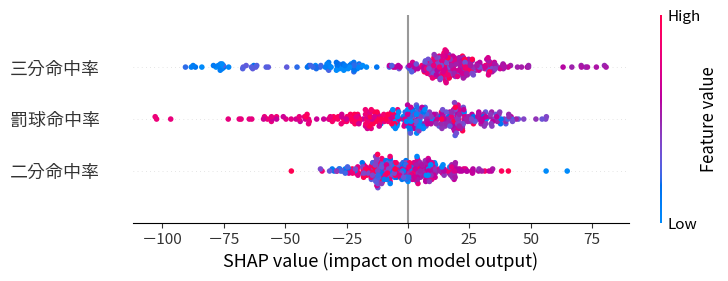

In [ ]:
shap.plots.beeswarm(shap_values['淨勝分']['主場_1.0']) # 可以找出CATE分群依據
plt.close()

In [ ]:
effect_train = estimator.effect(train[regressors])
effect_train

NameError: ignored

In [ ]:
effect_train[56]

In [ ]:
effect_test = estimator.effect(test[regressors])
effect_test